## **Serie A 2021/22**

_8 matches until the end of the season_

I've scraped data from the _FBref_ website to analyze the current state-of-doing of the Serie A Italian championship of football.

The break for the national teams leaves the league as is, with 8-9 games to play and with many situations to be determined.

These last matches could make the difference between an extraordinary season and an undertone season, or a season where the team achieves its goals.

xG stands for expected goals. It correspond to the probability that a shot will result in a goal based on the characteristics of that shot and the events leading up to it. 

Some of these characteristics/variables include:
- _Location of shooter_: How far was it from the goal and at what angle on the pitch?
- _Body part_: Was it a header or off the shooter's foot?
- _Type of pass_: Was it from a through ball, cross, set piece, etc?
- _Type of attack_: Was it from an established possession? Was it off a rebound? Did the defense have time to get in position? Did it follow a dribble?

An xG of 0 is a certain miss, while an xG of 1 is a certain goal. An xG of .5 would indicate that if identical shots were attempted 10 times, 5 would be expected to result in a goal.

There are a number of xG models that use similar techniques and variables, which attempt to reach the same conclusion. The model that FBref uses is provided by StatsBomb. What sets StatsBomb's xG model apart from others is their use of freeze frames. A freeze frame is the location of all players on the pitch at the moment the shot was taken.

In [67]:
# imports
import numpy as np
import pandas as pd

##### **Data Preparation**

In [68]:
df = pd.read_csv('../data/serieA.csv', index_col=0)
df.head()

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90
0,Milan,30,20,6,4,56,29,66,47.8,29.4,18.4,"0,61"
1,Napoli,30,19,6,5,53,22,63,46.9,22.3,24.7,"0,82"
2,Inter,29,17,9,3,62,24,60,60.2,30.8,29.4,"+1,01"
3,Juventus,30,17,8,5,47,26,59,40.3,28.4,11.9,"0,40"
4,Roma,30,15,6,9,50,35,51,52.3,31.8,20.5,"0,68"


In [69]:
# sort teams by alphabetic order
df = df.sort_values(by='Team')
df.head()

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90
5,Atalanta,29,14,9,6,51,31,51,47.4,31.7,15.7,"0,54"
13,Bologna,29,9,6,14,32,44,33,30.3,38.8,-8.5,"-0,29"
16,Cagliari,30,5,10,15,28,54,25,32.5,49.4,-16.9,"-0,56"
11,Empoli,30,8,9,13,41,55,33,38.0,49.5,-11.5,"-0,38"
7,Fiorentina,29,14,5,10,48,38,47,45.6,35.6,10.0,"0,34"


In [70]:
# check data types
df.dtypes

Team              object
Games              int64
Wins               int64
Draws              int64
Losses             int64
Goals_for          int64
Goals_against      int64
Points             int64
xG_for           float64
xG_against       float64
xG_diff          float64
xG_diff_per90     object
dtype: object

In [71]:
# remove whitespaces
df.Team = df.Team.str.replace(' ', '')
# df.columns = df.columns.str.strip()

In [72]:
# except for Hellas Verona
# df.loc[9, 'Team'] = "Hellas Verona"

##### **Data Modeling**

In [73]:
# add xG diff per 90 column
df['xG_diff_per90'] = df['xG_diff'] / df['Games']
df['xG_diff_per90'] = round(df['xG_diff_per90'], 2)
df.head(2)

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90
5,Atalanta,29,14,9,6,51,31,51,47.4,31.7,15.7,0.54
13,Bologna,29,9,6,14,32,44,33,30.3,38.8,-8.5,-0.29


In [74]:
# add points per game column
df['Points_per_game'] = df['Points'] / df['Games']
df['Points_per_game'] = round(df['Points_per_game'], 2)
df.head(2)

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90,Points_per_game
5,Atalanta,29,14,9,6,51,31,51,47.4,31.7,15.7,0.54,1.76
13,Bologna,29,9,6,14,32,44,33,30.3,38.8,-8.5,-0.29,1.14


In [75]:
# add squad value column
# from transfermarkt in alphabetic order
squad_value = [384900000, 146000000, 128550000, 91100000, 237000000, 112800000, 125830000, 528900000, 555600000, 267950000, 480100000, 493850000, 369350000, 54850000, 95900000, 233100000, 71300000, 221080000, 104250000, 82530000]
df['Squad_value'] = squad_value

In [76]:
df.head()

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90,Points_per_game,Squad_value
5,Atalanta,29,14,9,6,51,31,51,47.4,31.7,15.7,0.54,1.76,384900000
13,Bologna,29,9,6,14,32,44,33,30.3,38.8,-8.5,-0.29,1.14,146000000
16,Cagliari,30,5,10,15,28,54,25,32.5,49.4,-16.9,-0.56,0.83,128550000
11,Empoli,30,8,9,13,41,55,33,38.0,49.5,-11.5,-0.38,1.10,91100000
7,Fiorentina,29,14,5,10,48,38,47,45.6,35.6,10.0,0.34,1.62,237000000


In [77]:
# average xG for and average xG against
df['Avg_xG_for'] = df['xG_for'] / df['Games']
df['Avg_xG_for'] = round(df['Avg_xG_for'], 2)

df['Avg_xG_against'] = df['xG_against'] / df['Games']
df['Avg_xG_against'] = round(df['Avg_xG_against'], 2)

df.head()

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90,Points_per_game,Squad_value,Avg_xG_for,Avg_xG_against
5,Atalanta,29,14,9,6,51,31,51,47.4,31.7,15.7,0.54,1.76,384900000,1.63,1.09
13,Bologna,29,9,6,14,32,44,33,30.3,38.8,-8.5,-0.29,1.14,146000000,1.04,1.34
16,Cagliari,30,5,10,15,28,54,25,32.5,49.4,-16.9,-0.56,0.83,128550000,1.08,1.65
11,Empoli,30,8,9,13,41,55,33,38.0,49.5,-11.5,-0.38,1.10,91100000,1.27,1.65
7,Fiorentina,29,14,5,10,48,38,47,45.6,35.6,10.0,0.34,1.62,237000000,1.57,1.23


##### **Data Visualization**

In [78]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as ticker
from PIL import Image
import urllib
import os
%matplotlib inline

In [79]:
df = df.sort_values(by='Points', ascending=False)
df.head(2)

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90,Points_per_game,Squad_value,Avg_xG_for,Avg_xG_against
0,Milan,30,20,6,4,56,29,66,47.8,29.4,18.4,0.61,2.2,480100000,1.59,0.98
1,Napoli,30,19,6,5,53,22,63,46.9,22.3,24.7,0.82,2.1,493850000,1.56,0.74


In [80]:
df['path'] = '../data/images/' + df['Team'] + '.png'

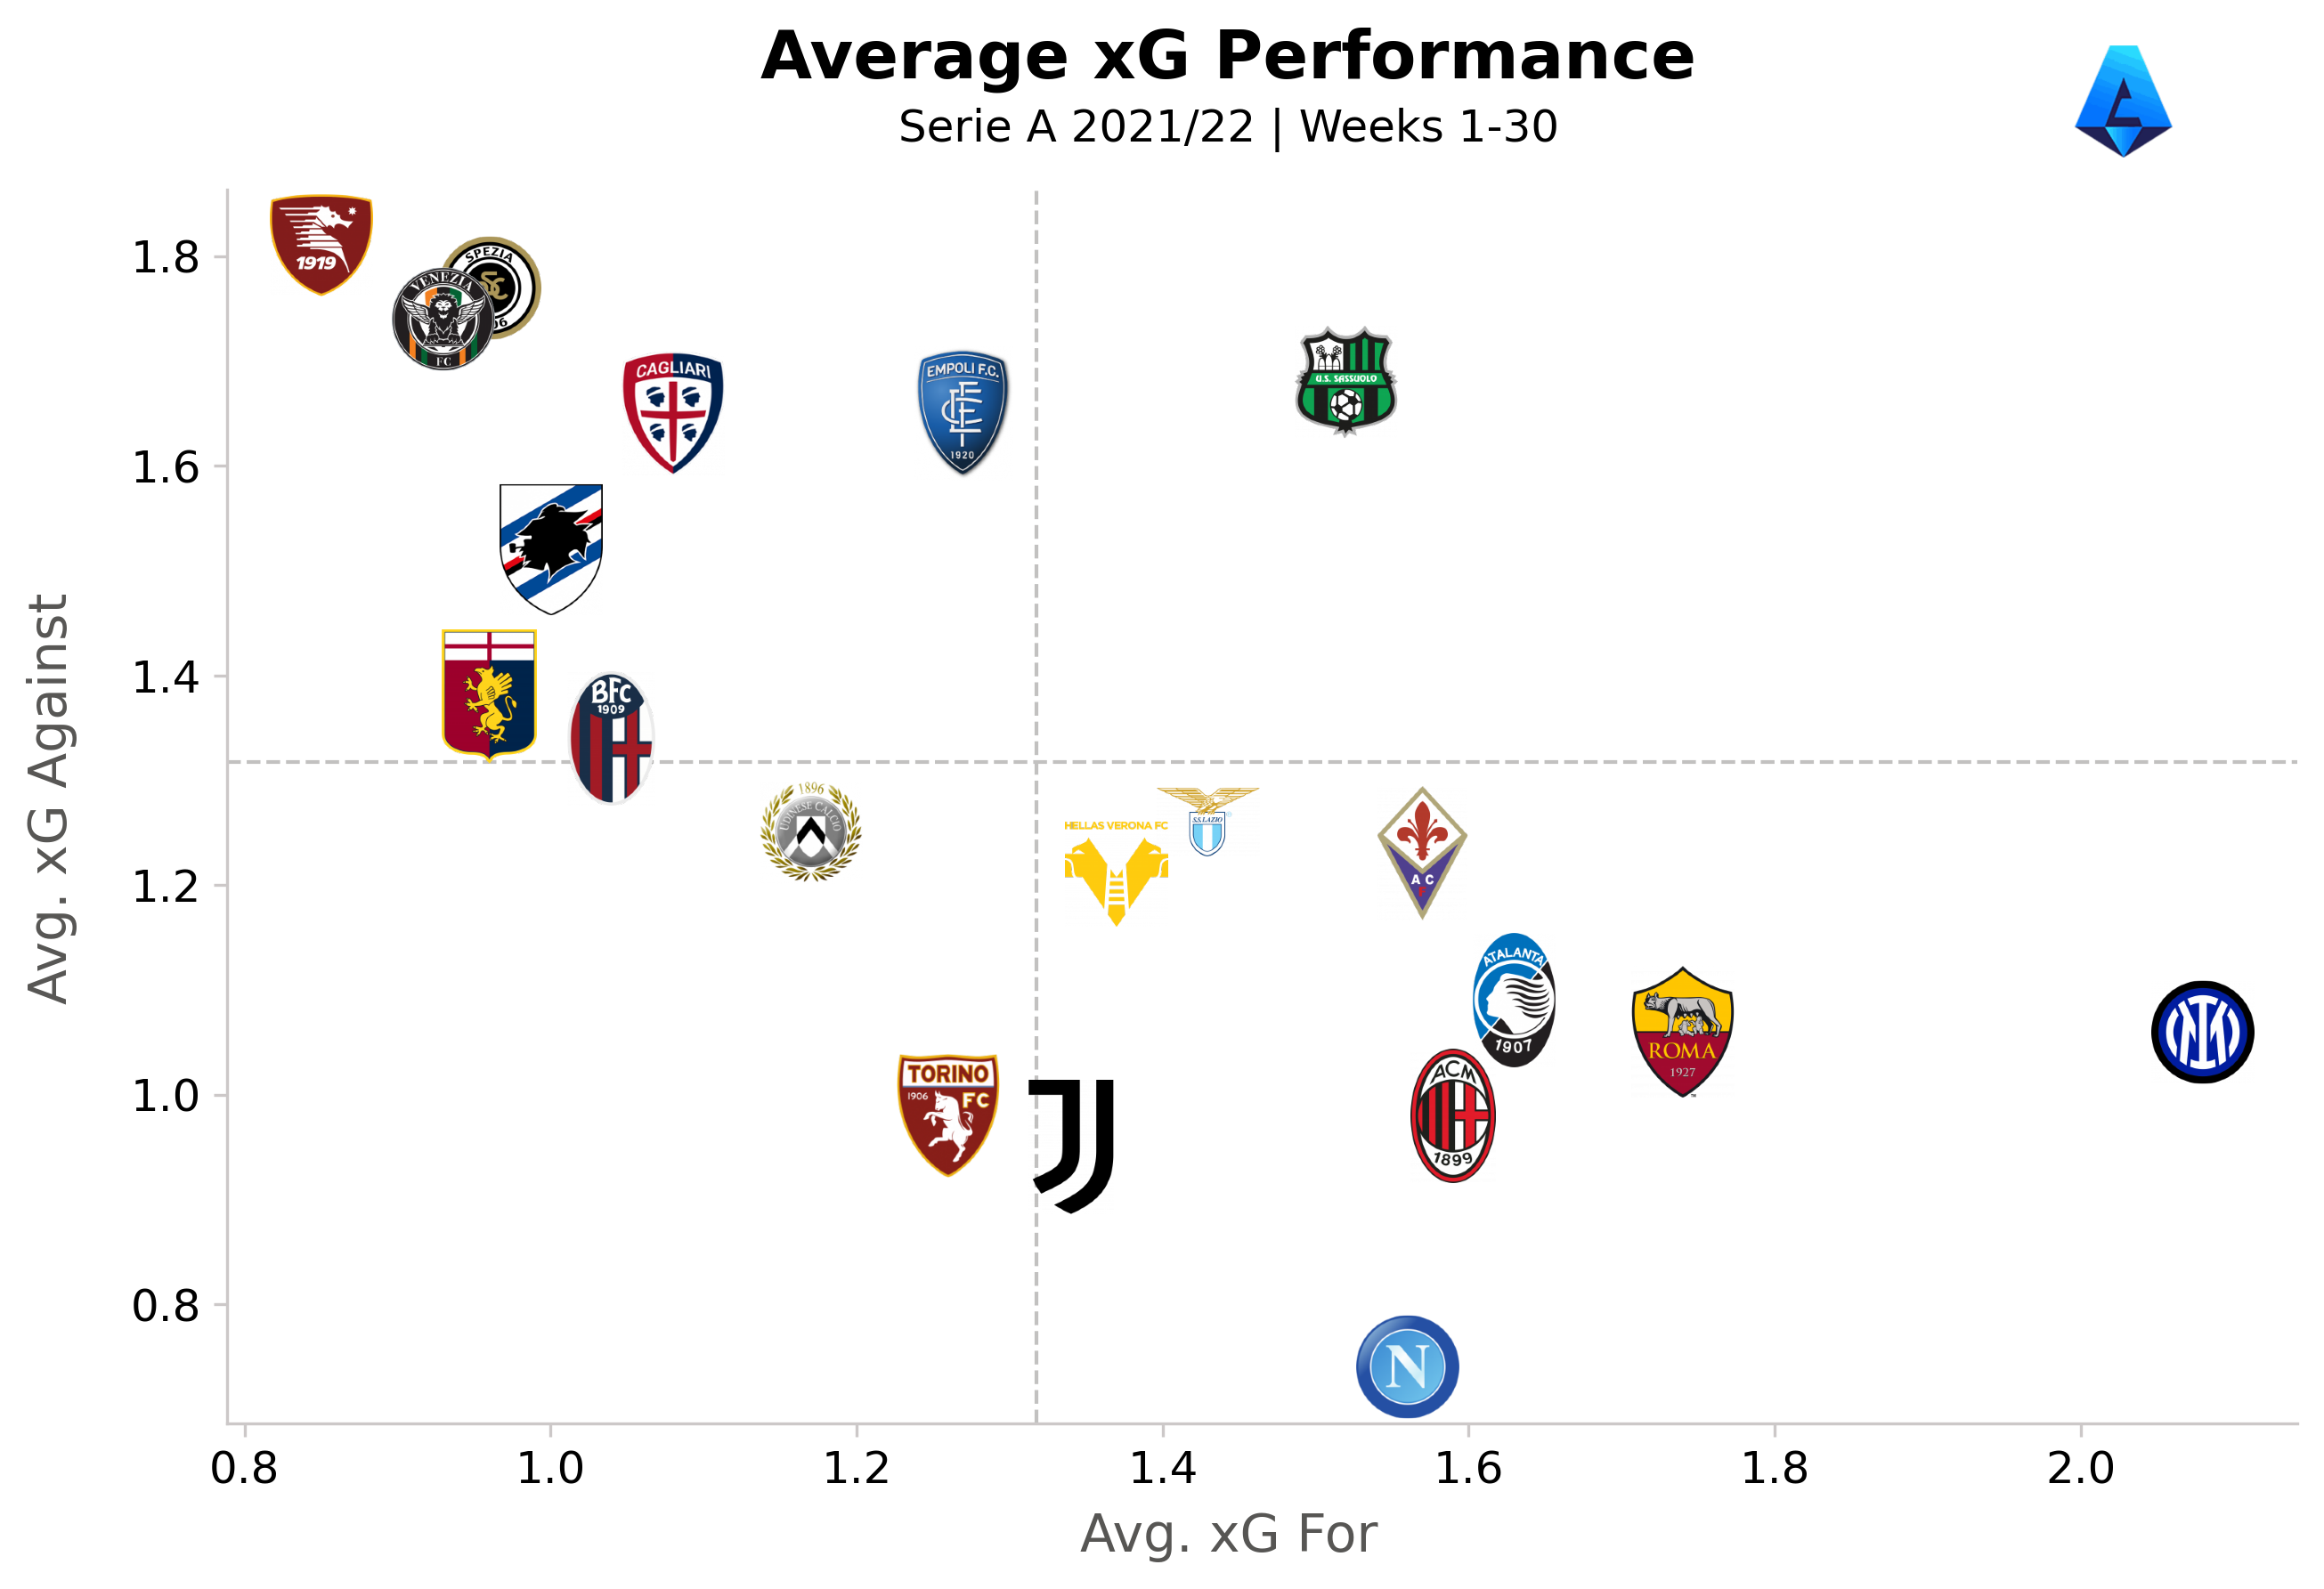

In [81]:
# create initial plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.set_facecolor('white')
ax.set_facecolor('white')

# scatter plot
ax.scatter(df['Avg_xG_for'], df['Avg_xG_against'], c='white')

# change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# plot logos
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.2, alpha=1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['Avg_xG_for'], row['Avg_xG_against']), frameon=False)
    ax.add_artist(ab)

# add average lines
ax.axhline(y=df['Avg_xG_against'].mean(), color='#c2c1c0', linestyle='--', linewidth=1)
ax.axvline(x=df['Avg_xG_for'].mean(), color='#c2c1c0', linestyle='--', linewidth=1)

# title & comment
fig.text(0.5, .95, 'Average xG Performance', size=18, ha='center', weight="bold")
fig.text(0.5, .91, 'Serie A 2021/22 | Weeks 1-30', size=12, ha='center', color='black')

# axes titles
fig.text(0.5, .03, 'Avg. xG For', size=14, color='#575654', ha='center')
fig.text(0.05, .5, 'Avg. xG Against', size=14, color='#575654', rotation=90, va='center')

# Serie A logo
fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/55.png"

logo_ax = fig.add_axes([0.8, 0.9, 0.07, 0.07], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# save figure
plt.savefig('../figures/xG-SerieA_2122.png', dpi=300, bbox_inches="tight")
plt.show()

_**Findings**_

A team's xG comparison (xG for - xG against) can indicate how a team should be performing. A negative goal difference but a positive xG difference might indicate a team has experienced poor luck or has below average finishing ability.

Basically, teams in the upper-right quadrant are dangerous when attacking, but they concede a lot.

Teams in the lower-right quadrant should stand in the first places of the standing as they are the ones most dangerous with a very good defense.

Teams in the lower-left quadrant are solid in defense, but they struggle at threaten the opponent's defense.

Teams in the upper-left quadrant should be the ones that occupy the lower places of the league as the concede a lot to their opponents and struggle to construct serious occasions.

We can observe from the plot that Inter is the most dangerous team while Napoli is the most solid one. This came as no surprise as the two teams are in the first three places of the standing.

AC Milan is the current leader of the league even if they aren't brilliant, or leaders, in the attacking phase or in the defensive phase. Will they be able to maintain their current position? From the plot it seems they are balancing from the two phases, but in the long-run as the history if this league teaches us, Napoli, with the better defense and a similar attack, could prevail.

Sassuolo has always been a reckless team and this plot doesn't lie about it. They are the only team in the upper-right corner of the quadrant as they build a lot of threat to opponents, but they fatigue to control attacks from them.

Considering the lower part of the league, Genoa is surprising because they grant few chances to the opponents, but they struggle too much to be a threat to them.


In [82]:
# plot for top 7 teams - the 7 sisters
df_top7 = df.head(7)
df_top7

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90,Points_per_game,Squad_value,Avg_xG_for,Avg_xG_against,path
0,Milan,30,20,6,4,56,29,66,47.8,29.4,18.4,0.61,2.20,480100000,1.59,0.98,../data/images/Milan.png
1,Napoli,30,19,6,5,53,22,63,46.9,22.3,24.7,0.82,2.10,493850000,1.56,0.74,../data/images/Napoli.png
2,Inter,29,17,9,3,62,24,60,60.2,30.8,29.4,1.01,2.07,528900000,2.08,1.06,../data/images/Inter.png
3,Juventus,30,17,8,5,47,26,59,40.3,28.4,11.9,0.40,1.97,555600000,1.34,0.95,../data/images/Juventus.png
4,Roma,30,15,6,9,50,35,51,52.3,31.8,20.5,0.68,1.70,369350000,1.74,1.06,../data/images/Roma.png
5,Atalanta,29,14,9,6,51,31,51,47.4,31.7,15.7,0.54,1.76,384900000,1.63,1.09,../data/images/Atalanta.png
6,Lazio,30,14,7,9,58,45,49,42.9,37.8,5.1,0.17,1.63,267950000,1.43,1.26,../data/images/Lazio.png


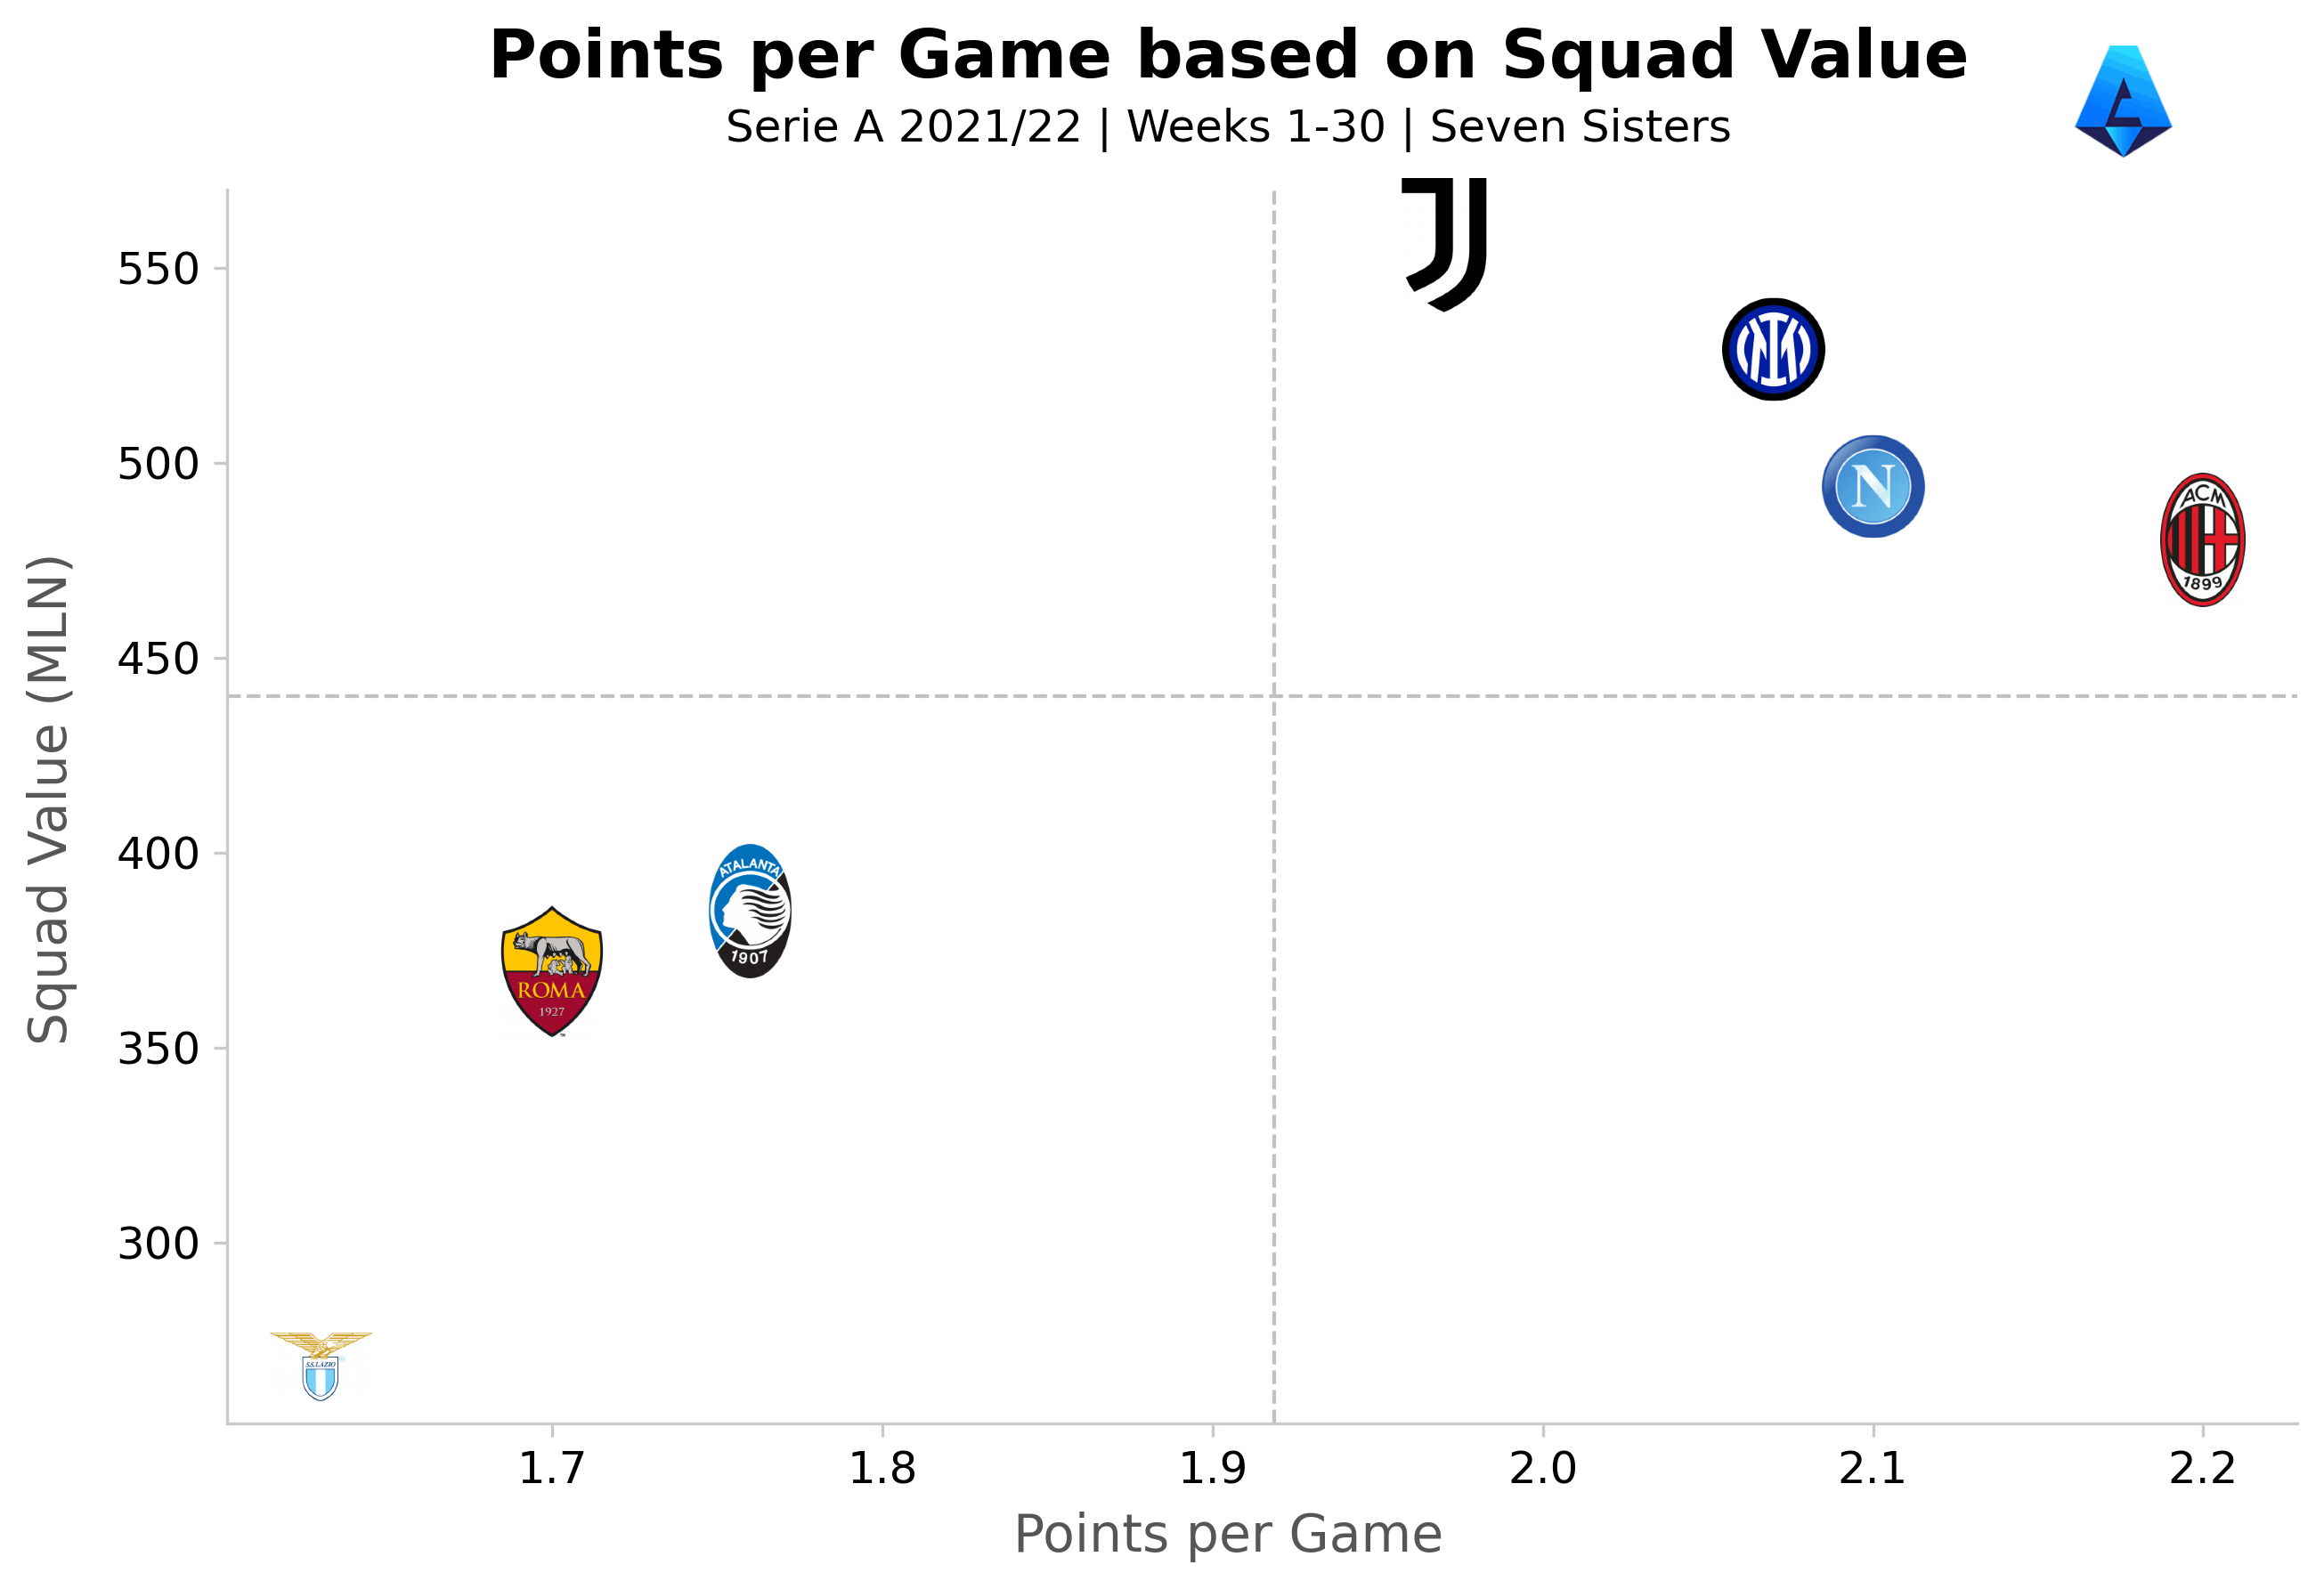

In [83]:
# plot points - squad value
# use points per game

# create initial plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.set_facecolor('white')
ax.set_facecolor('white')

# scatter plot
ax.scatter(df_top7['Points_per_game'], df_top7['Squad_value'], c='white')

# change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.2, alpha=1)

for index, row in df_top7.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['Points_per_game'], row['Squad_value']), frameon=False)
    ax.add_artist(ab)

# add average lines
ax.axhline(y=df_top7['Squad_value'].mean(), color='#c2c1c0', linestyle='--', linewidth=1)
ax.axvline(x=df_top7['Points_per_game'].mean(), color='#c2c1c0', linestyle='--', linewidth=1)

# text

# title & comment
fig.text(0.5, .95, 'Points per Game based on Squad Value', size=18, ha='center', weight="bold")
fig.text(0.5, .91, 'Serie A 2021/22 | Weeks 1-30 | Seven Sisters', size=12, ha='center', color='black')

# axes titles
fig.text(0.5, .03, 'Points per Game', size=14, color='#575654', ha='center')
fig.text(0.05, .5, 'Squad Value (MLN)', size=14, color='#575654', rotation=90, va='center')

# Serie A logo
fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/55.png"

logo_ax = fig.add_axes([0.8, 0.9, 0.07, 0.07], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# format y-axis tick labels to remove scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x / 10**6)))

# save figure
plt.savefig('../figures/xG-SerieA_2122-top7.png', dpi=300, bbox_inches = "tight")

_**Findings**_

This figure plots the squad value (in million euros) on the y-axis and the average of points per game on the x-axis, and allows us to observe some interesting results.

We can start by saying that the league standing doesn't represent the teams in order of squad value. Juventus, for instance, has the most valued team, but it's only at the fourth place for average points per game. So, Juventus is deluding since they have the squad with the maximum value in million euros, but they are only the 4th team in points per game.

AC Milan, on the other side, is the best performing team, considering its lowest squad value between the top four contenders.

The last 'three sisters', Atalanta, Roma and Lazio, follow instead their ordered values.

In [84]:
# plot for relegation battle
df_relegation = df.tail(6)
df_relegation

,Team,Games,Wins,Draws,Losses,Goals_for,Goals_against,Points,xG_for,xG_against,xG_diff,xG_diff_per90,Points_per_game,Squad_value,Avg_xG_for,Avg_xG_against,path
14,Sampdoria,30,8,5,17,39,51,29,29.9,45.6,-15.7,-0.52,0.97,95900000,1.00,1.52,../data/images/Sampdoria.png
15,Spezia,30,8,5,17,31,54,29,28.7,53.1,-24.4,-0.81,0.97,71300000,0.96,1.77,../data/images/Spezia.png
16,Cagliari,30,5,10,15,28,54,25,32.5,49.4,-16.9,-0.56,0.83,128550000,1.08,1.65,../data/images/Cagliari.png
17,Genoa,30,2,16,12,23,47,22,28.9,41.4,-12.5,-0.42,0.73,112800000,0.96,1.38,../data/images/Genoa.png
18,Venezia,29,5,7,17,25,54,22,27.0,50.6,-23.5,-0.81,0.76,82530000,0.93,1.74,../data/images/Venezia.png
19,Salernitana,29,3,7,19,22,68,16,24.7,52.5,-27.8,-0.96,0.55,54850000,0.85,1.81,../data/images/Salernitana.png


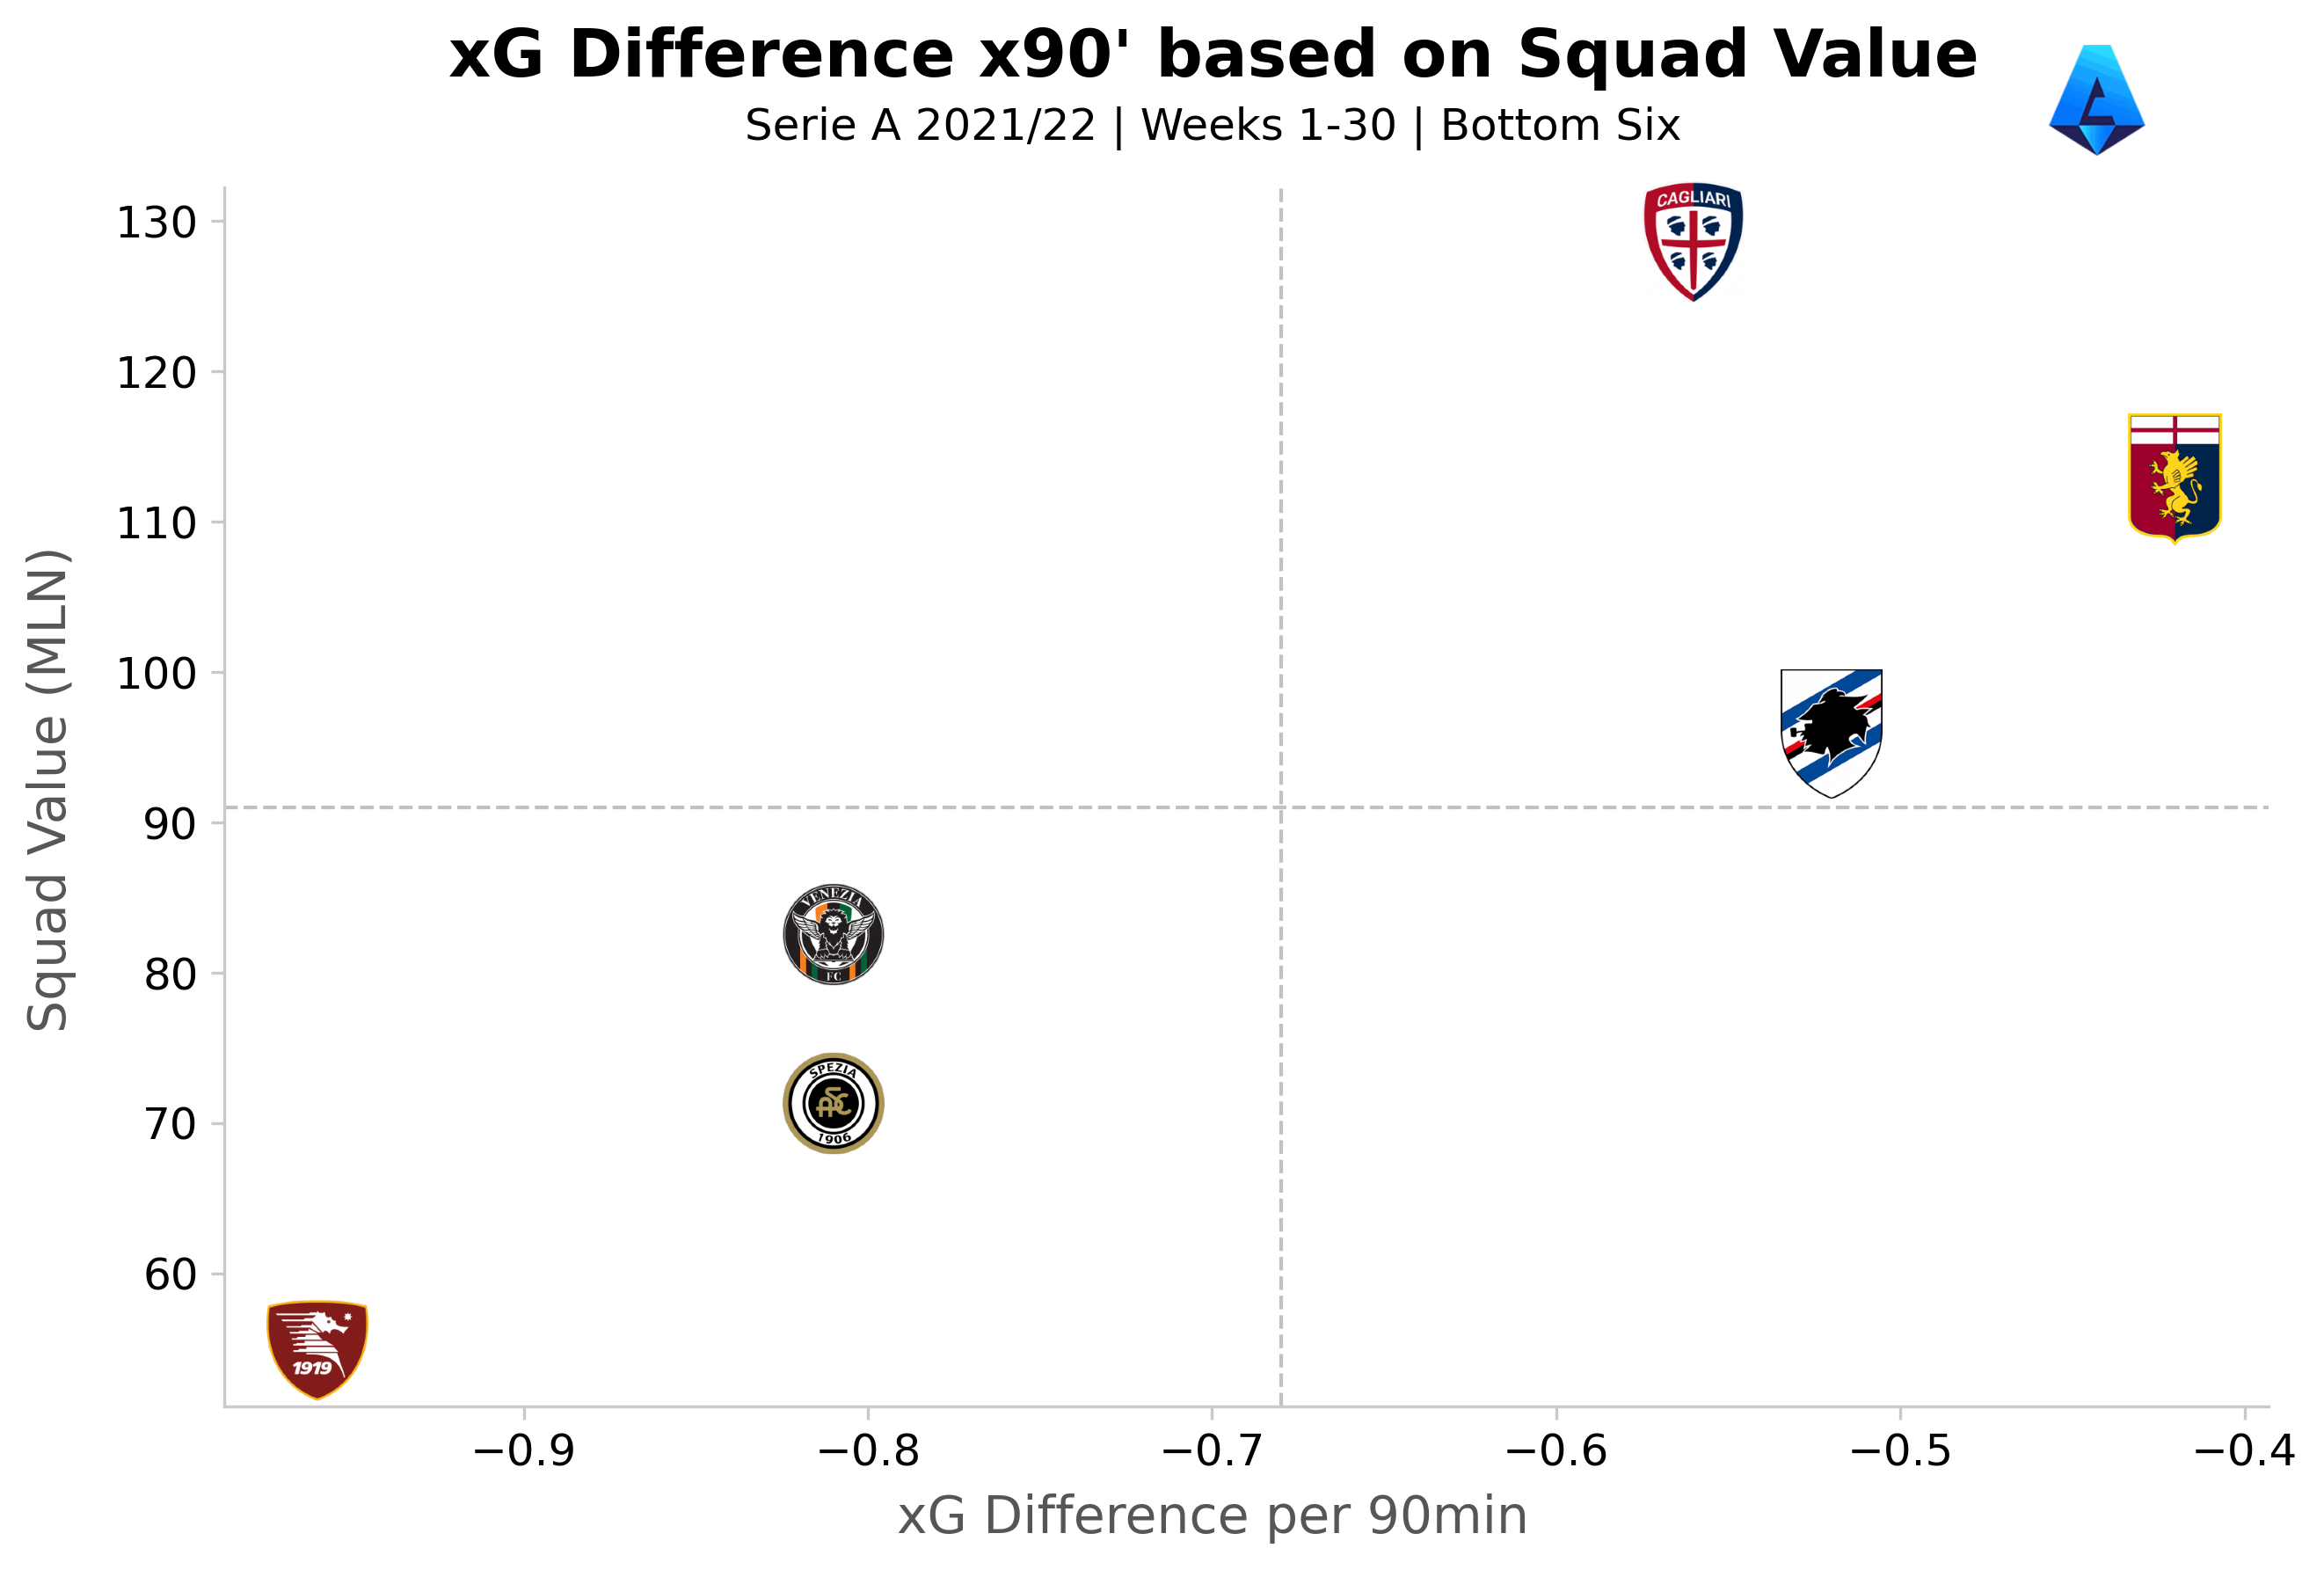

In [85]:
# plot xG diff per 90 - squad value
# set font and background colour

# create initial plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.set_facecolor('white')
ax.set_facecolor('white')

# scatter plot
ax.scatter(df_relegation['xG_diff_per90'], df_relegation['Squad_value'], c='white')

# change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.2, alpha=1)

for index, row in df_relegation.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG_diff_per90'], row['Squad_value']), frameon=False)
    ax.add_artist(ab)

# add average lines
ax.axhline(y=df_relegation['Squad_value'].mean(), color='#c2c1c0', linestyle='--', linewidth=1)
ax.axvline(x=df_relegation['xG_diff_per90'].mean(), color='#c2c1c0', linestyle='--', linewidth=1)

# text

# title & comment
fig.text(0.5, .95, 'xG Difference x90\' based on Squad Value', size=18, ha='center', weight="bold")
fig.text(0.5, .91, 'Serie A 2021/22 | Weeks 1-30 | Bottom Six', size=12, ha='center', color='black')

# axes titles
fig.text(0.5, .03, 'xG Difference per 90min', size=14, color='#575654', ha='center')
fig.text(0.05, .5, 'Squad Value (MLN)', size=14, color='#575654', rotation=90, va='center')

# Serie A logo
fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/55.png"

logo_ax = fig.add_axes([0.8, 0.9, 0.07, 0.07], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# format y-axis tick labels to remove scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x / 10**6)))

# save plot
plt.savefig('../figures/xG-SerieA_2122-bottom6.png', dpi=300, bbox_inches = "tight")

_**Findings**_

Salernitana deserves its last place on the table as its squad value is the lowest and it also has the worst xG difference per 90 minutes.

Genoa is 19th but they have the better xG difference of all the teams involved in the relegation battle.

Cagliari has the highest squad value and not many people expected them to struggle as much as they are currently doing.

Spezia is doing a fairly better job than Venezia, given their lower squad value, their identical xG difference per 90 minutes, but their different position on the table.